# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

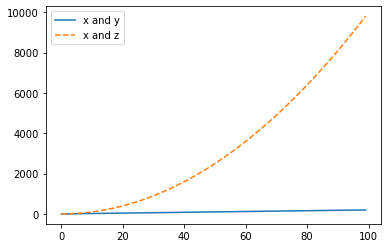

In [4]:
plt.plot(x, y, '-', label='x and y')
plt.plot(x, z, '--', label='x and z')
plt.legend()
plt.show();

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

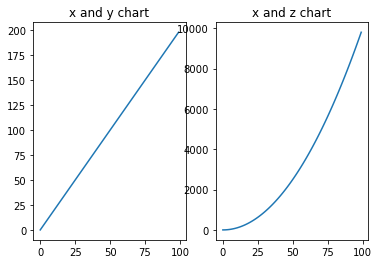

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=1)
axes[0].plot(x,y)
axes[0].set_title('x and y chart')
axes[1].plot(x,z)
axes[1].set_title('x and z chart')
plt.show();

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

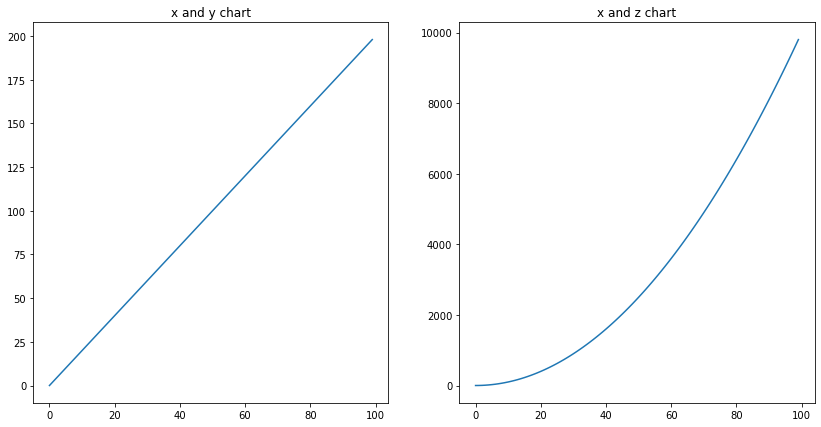

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 7))
axes[0].plot(x,y)
axes[0].set_title('x and y chart')
axes[1].plot(x,z)
axes[1].set_title('x and z chart')
plt.show();

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

In [7]:
import math

In [8]:
x = np.arange(0,100)
y = x**2
z = math.e**x

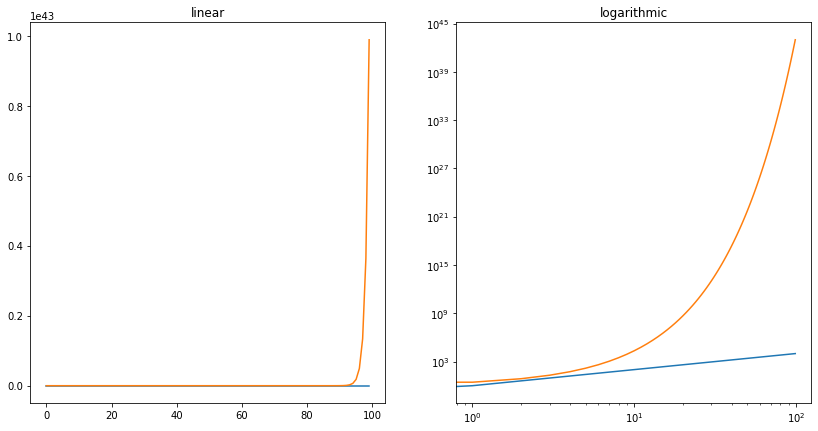

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 7))
#plot1
axes[0].plot(x,y)
axes[0].plot(x,z)
axes[0].set_title('linear')
axes[0].set_xscale("linear")
axes[0].set_yscale("linear")
#plot2
axes[1].plot(x,y)
axes[1].plot(x,z)
axes[1].set_title('logarithmic')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
plt.show();

#### As a bonus challenge, try to add a legend to the plot.

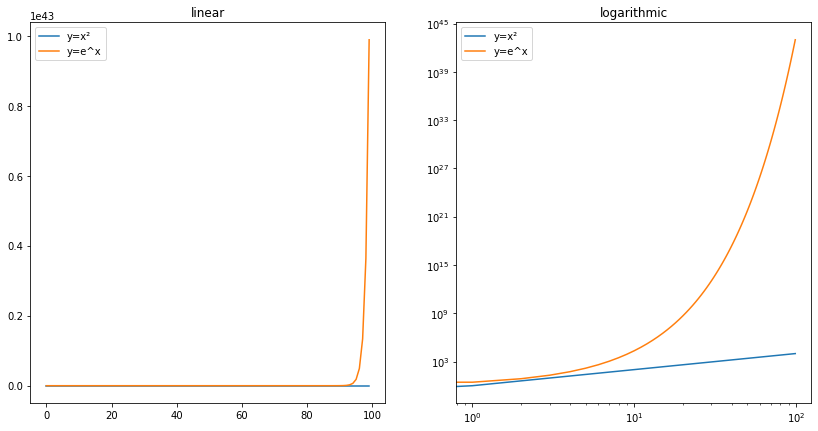

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 7))
#plot1
axes[0].plot(x,y,label="y=x²")
axes[0].plot(x,z,label="y=e^x")
axes[0].set_title('linear')
axes[0].set_xscale("linear")
axes[0].set_yscale("linear")
axes[0].legend()
#plot2
axes[1].plot(x,y,label="y=x²")
axes[1].plot(x,z,label="y=e^x")
axes[1].set_title('logarithmic')
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].legend()
plt.show();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [11]:
fitbit = pd.read_csv("../data/fitbit2.csv")

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [12]:
fitbit.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

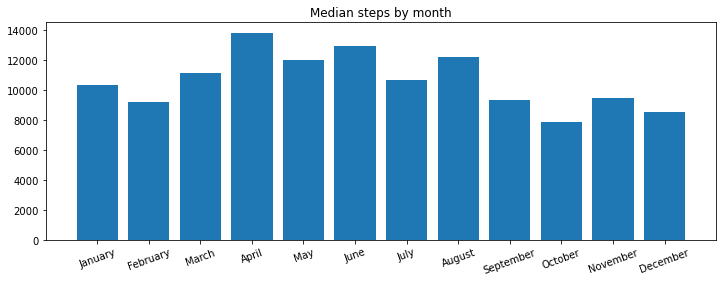

In [13]:
# MEDIAN STEPS BY MONTH_ENCODED

#Calculate the median of steps by month
median_steps_by_month = fitbit[['Months_encoded','Months','Steps']].groupby('Months').median().reset_index().sort_values(by=['Months_encoded'])

x=median_steps_by_month['Steps']
y=median_steps_by_month['Months']
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
axes.set_title('Median steps by month')
axes.bar(y,x)
labels = axes.get_xticklabels()
plt.setp(labels, rotation='20')
plt.show();
fig.savefig('../figures/median_steps_by_month_chart.png',
           orientation='landscape',
           transparent=False)

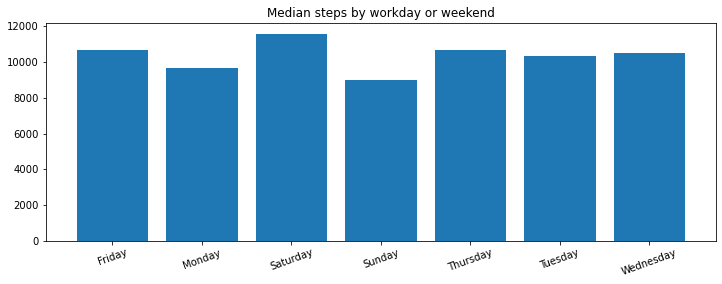

In [14]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
median_steps_by_month = fitbit[['Days','Steps']].groupby('Days').median().reset_index().sort_values(by=['Days'])

x=median_steps_by_month['Steps']
y=median_steps_by_month['Days']
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(12, 4))
axes.set_title('Median steps by workday or weekend')
axes.bar(y,x)
labels = axes.get_xticklabels()
plt.setp(labels, rotation='20')
plt.show();
fig.savefig('../figures/median_steps_by_weekday.png',
           orientation='landscape',
           transparent=False)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

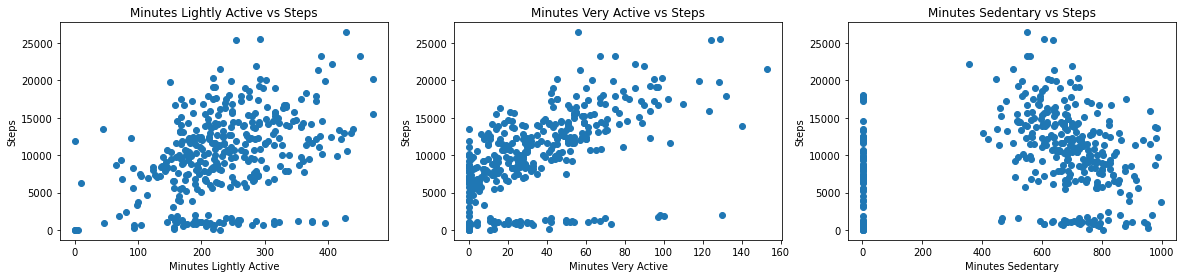

In [19]:
mla_vs_steps = fitbit[['Minutes Lightly Active','Steps']]
mva_vs_steps = fitbit[['Minutes Very Active','Steps']]
ms_vs_steps = fitbit[['Minutes Sedentary','Steps']]

plot_loop = [mla_vs_steps, mva_vs_steps, ms_vs_steps]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 4))
for y,x in enumerate(plot_loop): 
    axes[y].scatter(x.iloc[:,0],x.iloc[:,1])
    axes[y].set_title(x.columns[0]+' vs '+x.columns[1])
    axes[y].set_xlabel(x.columns[0])
    axes[y].set_ylabel(x.columns[1])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [20]:
titanic = pd.read_csv('../data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [22]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [29]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [31]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include='object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [32]:
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

In [39]:
Age = titanic['Age']

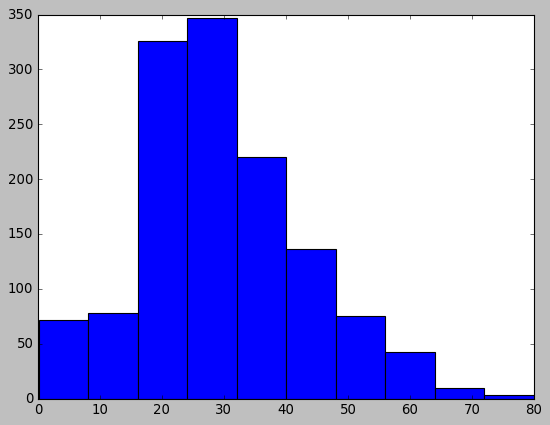

In [41]:
plt.hist(Age, bins=10)
plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

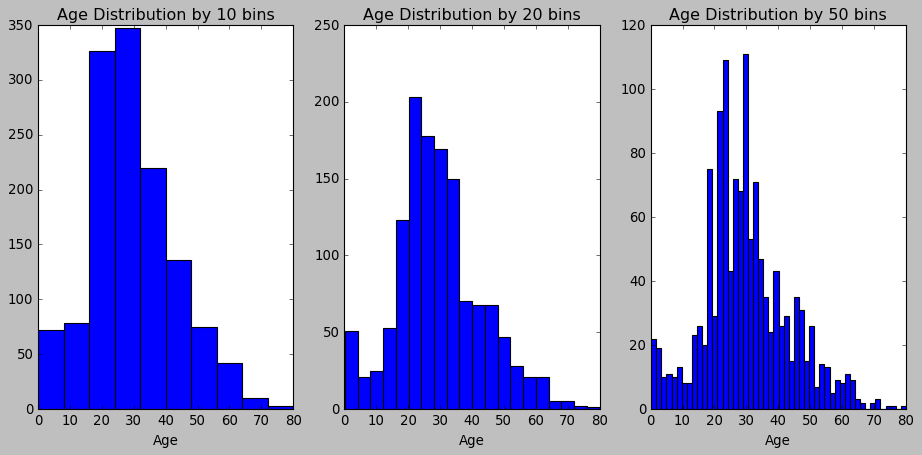

In [44]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(14, 6))
axes[0].hist(titanic['Age'],bins=10)
axes[0].set(title = 'Age Distribution by 10 bins', xlabel = 'Age' )
axes[1].hist(titanic['Age'],bins=20)
axes[1].set(title = 'Age Distribution by 20 bins', xlabel = 'Age' )
axes[2].hist(titanic['Age'],bins=50)
axes[2].set(title = 'Age Distribution by 50 bins', xlabel = 'Age' )
plt.show()

#### How does the bin size affect your plot?

In [ ]:
"""
The more bins the more detailed are the brackets or intervals. Therefore, it all depends on the level of granurality
that you'd like the dataset to have. 
"""

#### Use seaborn to show the distribution of column `Age`.

In [45]:
import seaborn as sns

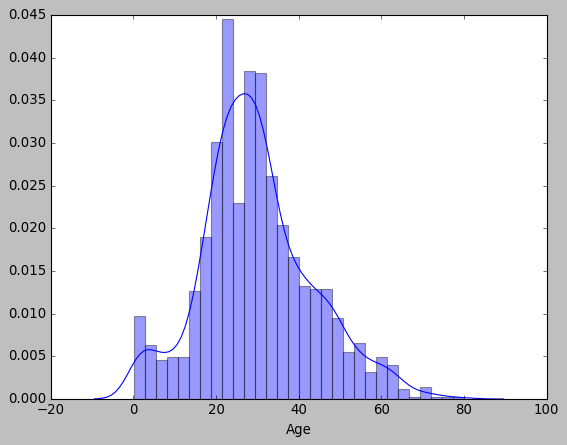

In [46]:
sns.distplot(Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

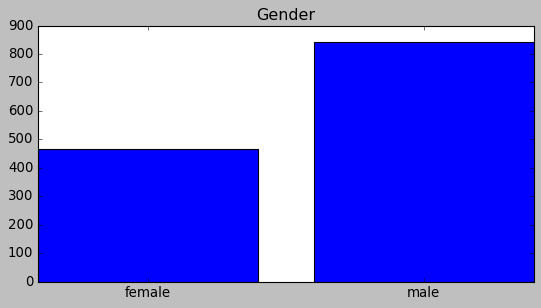

In [47]:
# Method 1 - matplotlib
gender_df = pd.DataFrame(titanic.groupby('Gender').size().reset_index())

fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
axes.set_title('Gender')
axes.bar(gender_df['Gender'],gender_df[0])
labels = axes.get_xticklabels()
plt.show()

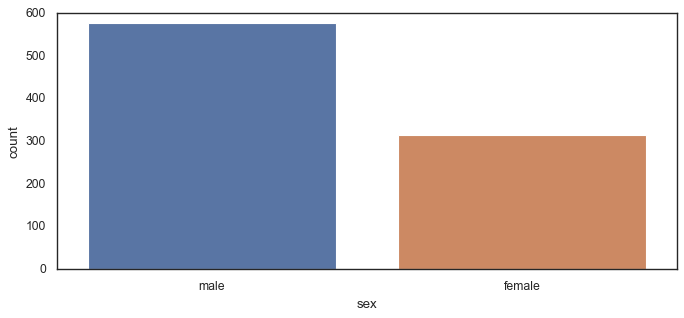

In [61]:
# Method 2 - seaborn
fig = plt.figure(figsize=(10,4))
sns.set(style="white")
ax = sns.countplot(titanic['sex'])

#### Use the right plot to visualize the column `Pclass`.

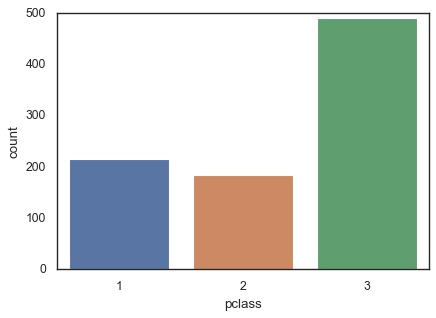

In [64]:
fig = plt.figure(figsize=(6, 4))
sns.set_style()
ax = sns.countplot(x=titanic['pclass'], data=titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

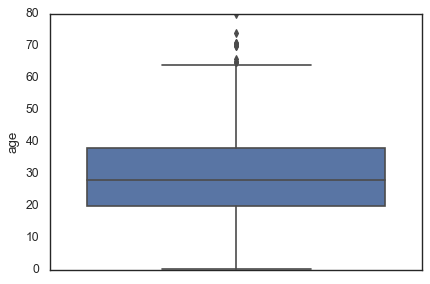

In [66]:
fig = plt.figure(figsize=(6, 4))
sns.set_style()
ax = sns.boxplot(y='age', data=titanic);

In [ ]:
"""
We'll use a boxplot chart because it encapsulates all the descriptive values from a statistic standpoint, such us
the median, the max and the minimum values, the interquartiles and the outliers if there are any.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The median age is located around 29 years old. There are some people above 64, which are considered outliers. 
Half of the observations are between 20 and 40 age bracket.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here